# **Project Name** - Customer Support Analysis for Flipkart

##### **Project Type** - Exploratory Data Analysis (EDA)

# **Project Summary -**
This project analyzes customer support data from Flipkart to uncover patterns in customer interactions, support efficiency, and satisfaction levels. By examining response times, issue categories, and CSAT scores, the analysis aims to suggest data-driven improvements for Flipkart’s customer service operations.

# GitHub Link 
https://github.com/suji-312

# **Problem Statement**
Flipkart aims to reduce complaint volume and increase support efficiency. This project analyzes support interaction data to help achieve that goal.

#### ** Business Objective?**
To identify the main issues raised by customers, monitor agent/team performance, and suggest ways to improve overall customer satisfaction.

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
df = pd.read_csv(r"C:\Users\kamal\Downloads\Customer_support_data.csv")

In [3]:
print(df.columns.tolist())


['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported_at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [4]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


In [5]:
# Convert datetime columns with correct format
df['Issue_reported_at'] = pd.to_datetime(df['Issue_reported_at'], dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], dayfirst=True)

# Calculate response time in minutes
df['response_time_minutes'] = (df['issue_responded'] - df['Issue_reported_at']).dt.total_seconds() / 60


### Dataset First View

In [6]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported_at,issue_responded,Survey_response_Date,...,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time_minutes
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,...,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,...,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,...,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,...,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,...,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0


### Dataset Rows & Columns count

In [7]:
df.shape

(85907, 21)

### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unique id                85907 non-null  object        
 1   channel_name             85907 non-null  object        
 2   category                 85907 non-null  object        
 3   Sub-category             85907 non-null  object        
 4   Customer Remarks         28742 non-null  object        
 5   Order_id                 67675 non-null  object        
 6   order_date_time          17214 non-null  object        
 7   Issue_reported_at        85907 non-null  datetime64[ns]
 8   issue_responded          85907 non-null  datetime64[ns]
 9   Survey_response_Date     85907 non-null  object        
 10  Customer_City            17079 non-null  object        
 11  Product_category         17196 non-null  object        
 12  Item_price               17206 n

#### Duplicate Values

In [9]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported_at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
response_time_minutes          0
dtype: int64

### What did you know about your dataset?

The dataset contains over 85,000 customer support interactions including issue types, response times, CSAT scores, and shift details. Some columns have missing data.

## ***2. Understanding Your Variables***

### Variables Description
- `category`: Type of issue
- `issue_reported_at`: When the issue was raised
- `issue_responded`: When the issue was addressed
- `CSAT_Score`: Customer satisfaction score
- `Agent_Shift`: Time of shift (Morning/Evening/Night)

### Check Unique Values for each variable.

In [11]:
df.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported_at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
response_time_minutes       4189
dtype: int64

## ***3. Data Visualization, Storytelling & Experimenting***

#### Chart - 1: CSAT Score Distribution

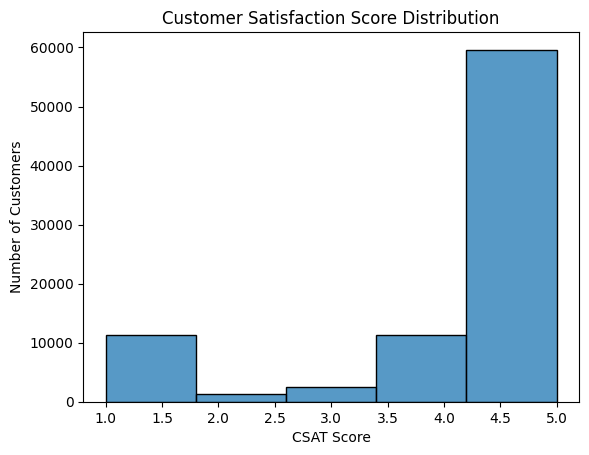

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CSAT Score'], bins=5)  # Replace with actual column name
plt.title('Customer Satisfaction Score Distribution')
plt.xlabel('CSAT Score')
plt.ylabel('Number of Customers')
plt.show()


#### Chart - 2: Most Common Issue Categories

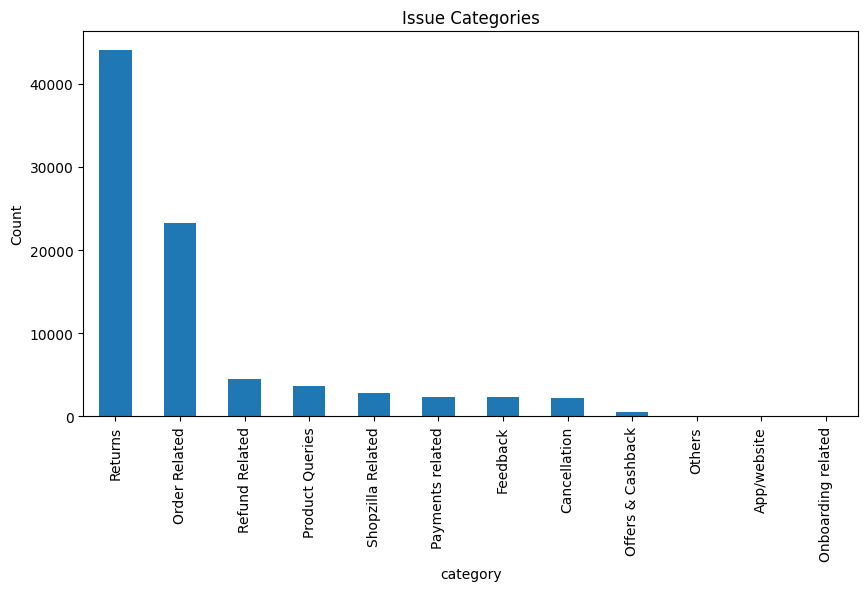

In [13]:
df['category'].value_counts().plot(kind='bar', figsize=(10,5), title='Issue Categories')
plt.ylabel('Count')
plt.show()

#### Chart - 3: Avg. Response Time by Issue Category

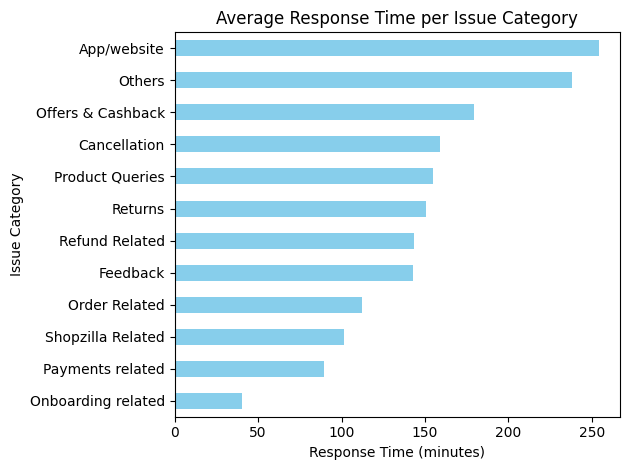

In [14]:
# Plot average response time per issue category
df.groupby("category")["response_time_minutes"].mean().sort_values().plot(kind="barh", color="skyblue")
plt.title("Average Response Time per Issue Category")
plt.xlabel("Response Time (minutes)")
plt.ylabel("Issue Category")
plt.tight_layout()
plt.show()

#### Chart - 4: CSAT by Agent Shift

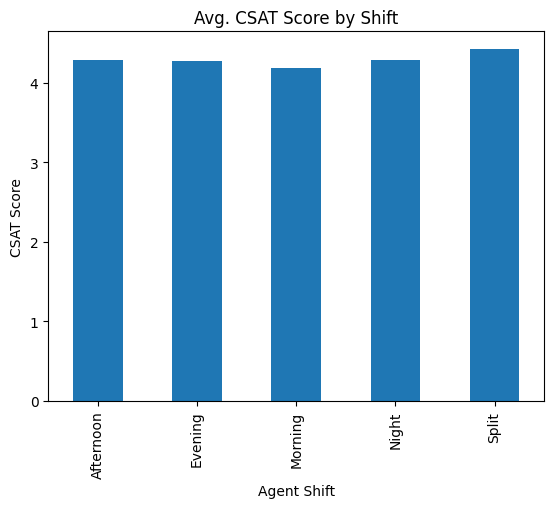

In [17]:
df.groupby('Agent Shift')['CSAT Score'].mean().plot(kind='bar', title='Avg. CSAT Score by Shift')
plt.ylabel('CSAT Score')
plt.show()


#### Chart - 5: Correlation Heatmap

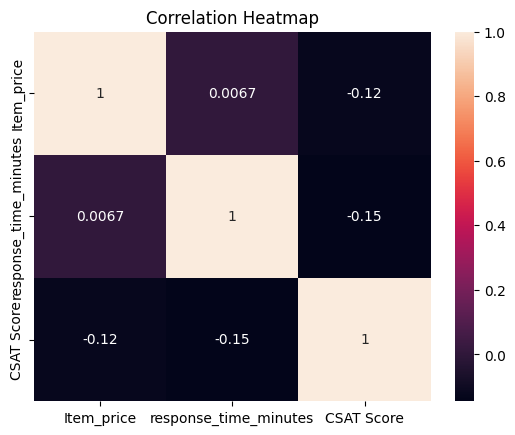

In [16]:
sns.heatmap(df[['Item_price','response_time_minutes','CSAT Score']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


## **5. Solution to Business Objective**

- Prioritize automation in most common issues
- Provide training for agents/shifts with lower CSAT
- Reduce delays in categories with higher response time

# **Conclusion**

This project helped uncover critical insights into Flipkart’s customer support system. The analysis showed the most frequent issue categories, average response times by type, and how shift timings impact CSAT scores. These findings can directly assist in improving response times and customer satisfaction.